In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv('Debit_Full', index_col = 0)

Ideas I would like to implement: <br> 
1) First find how many transactions I have had per day (if possible per week) <br>
2) Find total cost per day(if possible per week) <br>
3) Do a separate graph of total income along with total cost by day ( week or month) <br>
4) Find how much I pay for groceries, restaurants, clothing, miscillaneous <br>


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['T_PerDay'] = df.groupby('Date')['Purchase'].transform('sum')
df['Month_Year'] = df['Date'].dt.to_period('M')

In [10]:
df_dategroup = df.groupby('Date')[['Purchase']].sum()

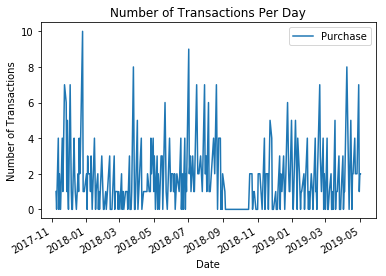

In [11]:
df_dategroup.plot()
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Day')
plt.show()

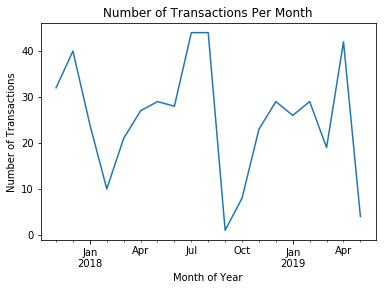

In [14]:
df_mygp = df.groupby('Month_Year')['Purchase'].sum()
df_mygp.plot()
plt.title('Number of Transactions Per Month')
plt.xlabel('Month of Year')
plt.ylabel('Number of Transactions')
plt.show()


In [28]:
#Here I will create deposit and withdrawal
df['Shopping_Cost'] = (df['Purchase'] * df['Cost']).abs()
def deposit(c):
    if c['Cost'] > 0 & c['Purchase'] == 0:
        return c['Cost']
    else:
        return 0.00
df['Deposit'] = df.apply(deposit, axis = 1)

In [30]:
df

,Date,Cost,Purchase,State,City,Stores,T_PerDay,Month_Year,Shopping_Cost,Deposit
0,2017-11-09,-17.53,1,UT,PROVO,ASIAN MARKET PROVO,1,2017-11,17.53,0.00
1,2017-11-09,-11.00,0,NaN,NaN,NaN,1,2017-11,0.00,0.00
2,2017-11-10,36.37,0,NaN,NaN,NaN,0,2017-11,0.00,36.37
3,2017-11-13,-3.21,1,UT,PROVO,DOLLAR TR 1360,4,2017-11,3.21,0.00
4,2017-11-13,-6.14,1,UT,PROVO,ASIAN MARKET PROVO,4,2017-11,6.14,0.00
5,2017-11-13,-14.82,1,UT,PROVO,CAFE 300 PROVO,4,2017-11,14.82,0.00
6,2017-11-13,-7.17,1,UT,PROVO,BYU STORE PROVO,4,2017-11,7.17,0.00
7,2017-11-13,-10.00,0,NaN,NaN,NaN,4,2017-11,0.00,0.00
8,2017-11-13,-37.42,0,NaN,NaN,NaN,4,2017-11,0.00,0.00
9,2017-11-14,500.00,0,NaN,NaN,NaN,0,2017-11,0.00,500.00
